In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
data = pd.read_csv("WineQT.csv")

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


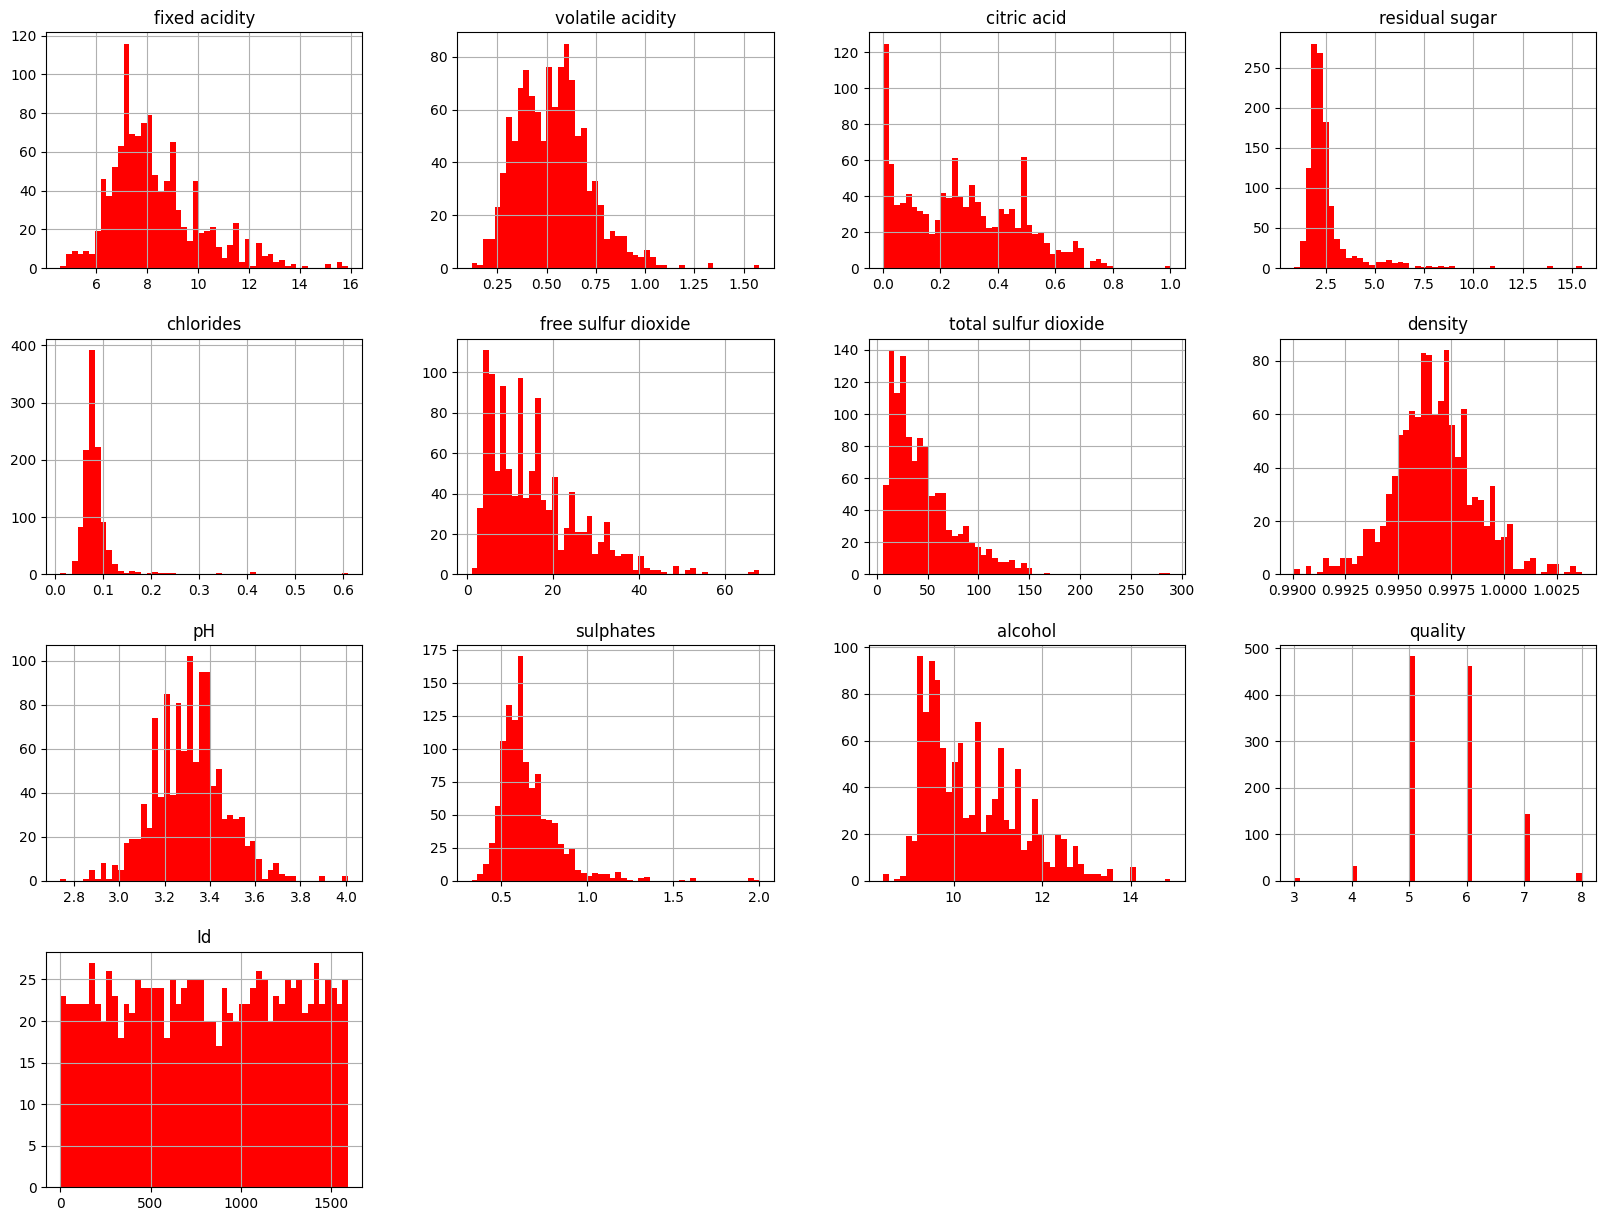

In [7]:
data.hist(bins = 50, figsize = (20,15), color = "red")
plt.show()

In [8]:
columns_to_transform = ['alcohol', 'sulphates', 'total sulfur dioxide', 
                        'free sulfur dioxide', 'chlorides', 'residual sugar', 
                        'citric acid', 'volatile acidity', 'fixed acidity']

# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

# Apply the Quantile Transformation
data[columns_to_transform] = quantile_transformer.fit_transform(data[columns_to_transform])

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.411534,1.035790,-5.199338,-0.658043,-0.248427,-0.244548,-0.101796,0.9978,3.51,-0.582009,-1.029375,5,0
1,-0.090452,1.798663,-5.199338,0.681594,1.023003,0.914679,0.824933,0.9968,3.20,0.439001,-0.341493,5,1
2,-0.090452,1.318946,-0.961429,0.218773,0.759677,0.153660,0.513491,0.9970,3.26,0.251016,-0.341493,5,2
3,1.391202,-1.575613,1.439001,-0.658043,-0.325577,0.364191,0.644086,0.9980,3.16,-0.370902,-0.341493,6,3
4,-0.411534,1.035790,-5.199338,-0.658043,-0.248427,-0.244548,-0.101796,0.9978,3.51,-0.582009,-1.029375,5,4


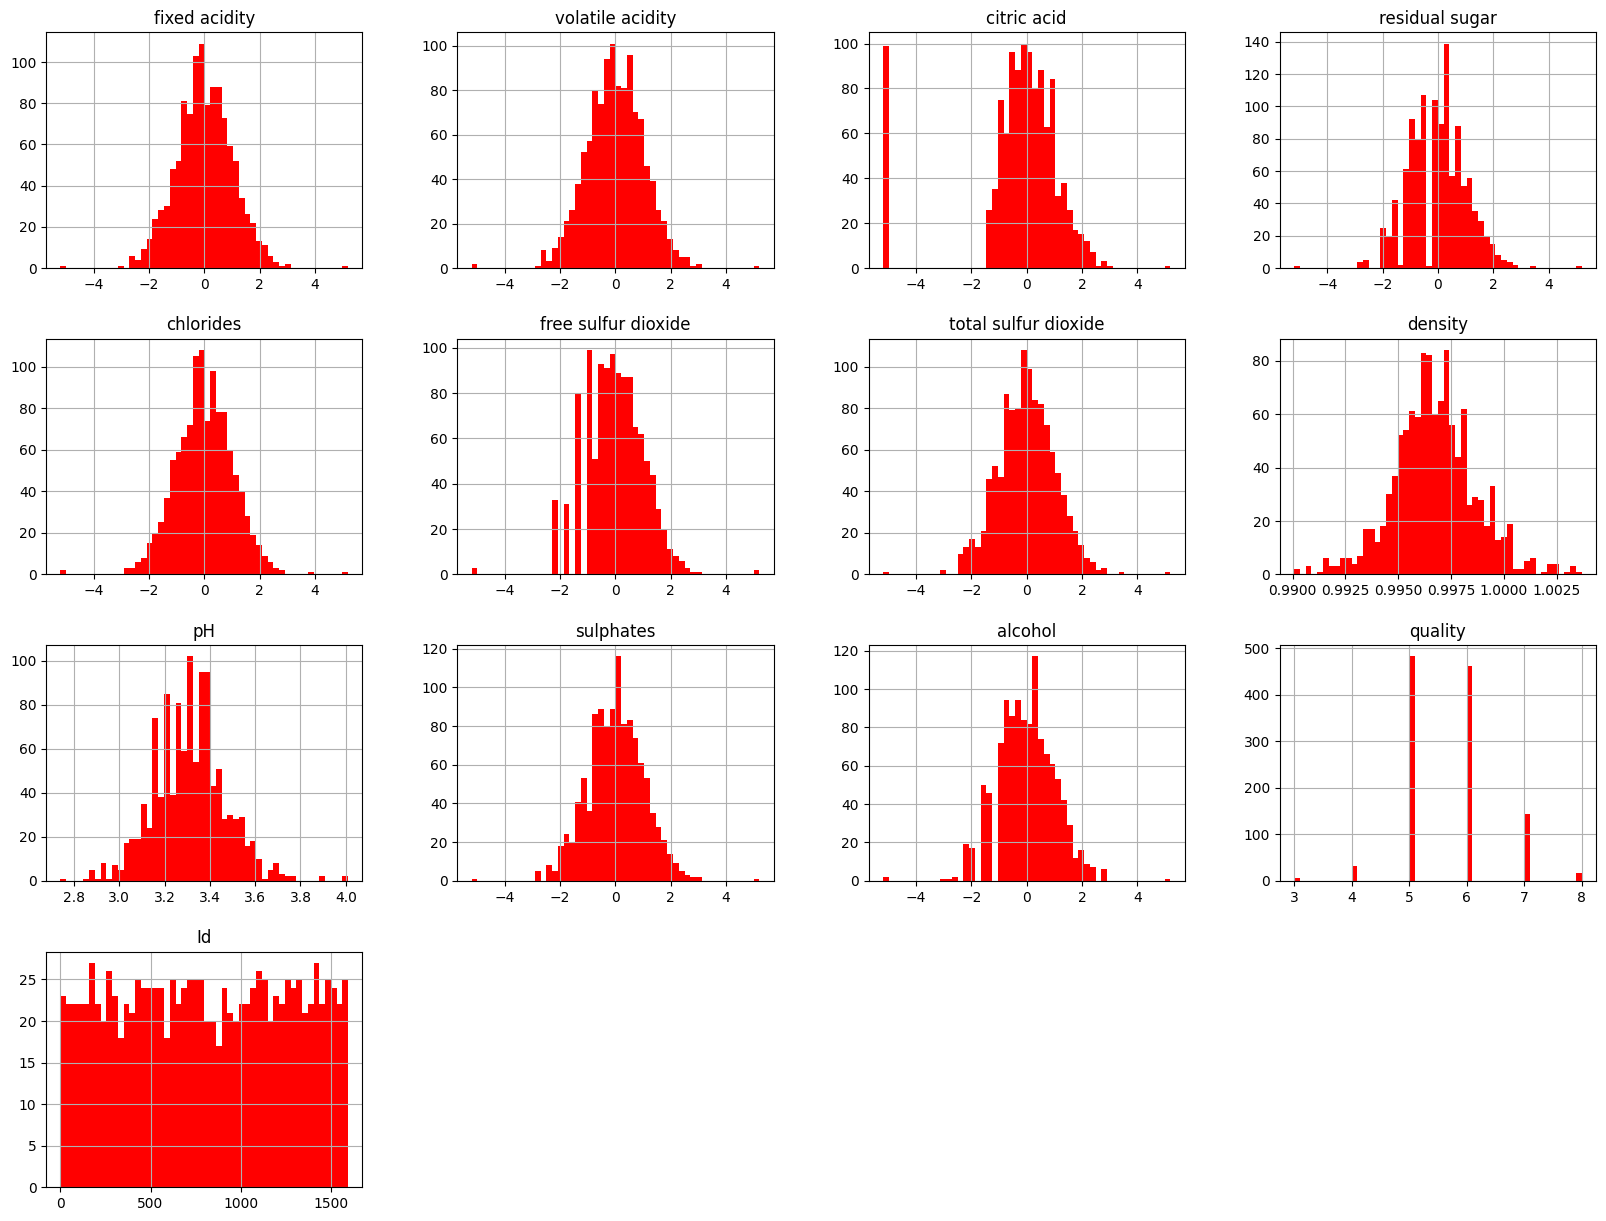

In [10]:
data.hist(bins = 50, figsize = (20,15), color = "red")
plt.show()

In [11]:
data = data.drop(['Id'], axis = 1)

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.411534,1.035790,-5.199338,-0.658043,-0.248427,-0.244548,-0.101796,0.9978,3.51,-0.582009,-1.029375,5
1,-0.090452,1.798663,-5.199338,0.681594,1.023003,0.914679,0.824933,0.9968,3.20,0.439001,-0.341493,5
2,-0.090452,1.318946,-0.961429,0.218773,0.759677,0.153660,0.513491,0.9970,3.26,0.251016,-0.341493,5
3,1.391202,-1.575613,1.439001,-0.658043,-0.325577,0.364191,0.644086,0.9980,3.16,-0.370902,-0.341493,6
4,-0.411534,1.035790,-5.199338,-0.658043,-0.248427,-0.244548,-0.101796,0.9978,3.51,-0.582009,-1.029375,5


In [13]:
x = data.drop(["quality"], axis = 1)
y = data["quality"]

In [14]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.411534,1.035790,-5.199338,-0.658043,-0.248427,-0.244548,-0.101796,0.9978,3.51,-0.582009,-1.029375
1,-0.090452,1.798663,-5.199338,0.681594,1.023003,0.914679,0.824933,0.9968,3.20,0.439001,-0.341493
2,-0.090452,1.318946,-0.961429,0.218773,0.759677,0.153660,0.513491,0.9970,3.26,0.251016,-0.341493
3,1.391202,-1.575613,1.439001,-0.658043,-0.325577,0.364191,0.644086,0.9980,3.16,-0.370902,-0.341493
4,-0.411534,1.035790,-5.199338,-0.658043,-0.248427,-0.244548,-0.101796,0.9978,3.51,-0.582009,-1.029375


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [35]:
lr = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
# lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [38]:
predicted_value = lr.predict(x_test)

In [39]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.6213050150111102
mae =  0.4848853526062972
r2 =  0.30630968704291417
